<a href="https://www.kaggle.com/code/rumbare/basics-of-diffusers-huggingface?scriptVersionId=163146205" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Summary
1. Basics of Diffusers libraries of Huggingface. 
2. Downloading models from from huggingface and civitai
3. Using multiple GPUs (two in this case)
4. Understanding basic parameters for pipeline


# Installing Difffusers and Dependencies

In [1]:
!pip install diffusers   # Library having pretrained diffusion models 
!apt -y install -qq aria2  # aria2 can download a file from multiple sources/protocols and tries to utilize your maximum download bandwidth.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.3 MB/s eta 0:00:00
The following additional packages will be installed:
  libaria2-0 libc-ares2 libssh2-1
The following NEW packages will be installed:
  aria2 libaria2-0 libc-ares2 libssh2-1
0 upgraded, 4 newly installed, 0 to remove and 30 not upgraded.
Need to get 1551 kB of archives.
After this operation, 6235 kB of additional disk space will be used.

78Selecting previously unselected package libc-ares2:amd64.
(Reading database ... 113807 files and directories currently installed.)
Preparing to unpack .../libc-ares2_1.15.0-1ubuntu0.4_amd64.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [  6%] [###.......................................................] 8Unpacking libc-ares2:amd64 (1.15.0-1ubuntu0.4) ...
7Progress: [ 12%] [######....................................................] 8Selecting previously unselected package libssh2-1:amd64.
Preparing to unpack .../lib

# Importing classes and module

In [2]:
from diffusers import AutoPipelineForText2Image# generic pipeline class that instantiates a text-to-image pipeline class
from diffusers import StableDiffusionXLPipeline  # another pipeline class for loading models
from diffusers import DPMSolverMultistepScheduler #changing scheduler of a model
import torch  # ML library used for creating deep neural networks

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-02-17 03:09:21.544888: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-17 03:09:21.545018: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-17 03:09:21.682542: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Create / Define Pipeline

In [3]:
pipeline = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", # sdxl base model (you can find models on huggingface, copy paste any model you want)
    use_safetensors=True, # its optional but gives explicit control,
    torch_dtype=torch.float16, #Specify tensor data type.
    variant="fp16" #fp16 variant of sdxl model 
)

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

# Load pipeline into GPU 

**In kaggle we have two GPUs of 16GB each, we can specify which GPU to use among them**
* first device :: "cuda:0"                            
* second device :: "cuda:1"

In [4]:
pipeline.to("cuda") # this is same as pipeline.to("cuda:0") 
# We can see various compenents of pipeline here now

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.26.3",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

# now we can define parameters for pipeline

In [5]:
prompt = "(Bag end the shire city hobbiton hobbit village lord of rings movie  Peter Jackson movie beautiful nature landscape high quality, realistic"
# Every pipeline needs a prompt which guides the unet model  you can see unet component in the above cell
height = 1024 # height of the image. SDXL works better with 1024p
width = 1024 # same as height you can change but it is recommended to use 1024
guidance_scale = 7.5 # controls how much the final image adheres to the text prompt.
num_inference_steps = 50 #  number of denoising steps. More denoising steps usually lead to a higher quality image 
# You can even use 30 steps and it will make it even faster

negative_prompt = "bad image, low res, worst quality, animated, blurry" # it is optional 
# inshort negative prompt says i dont want this


# Now generate image
define image variable

In [6]:
image = pipeline(
    prompt=prompt,
    height=height,
    width=width,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,)

# now you can see gpu doing some action in the right corner of the editor

  0%|          | 0/50 [00:00<?, ?it/s]

**What this image variable actually is**

In [7]:
print("type : " ,type(image) )
print("image : " ,image)
print("image.images" ,image.images)

type :  <class 'diffusers.pipelines.stable_diffusion_xl.pipeline_output.StableDiffusionXLPipelineOutput'>
image :  StableDiffusionXLPipelineOutput(images=[<PIL.Image.Image image mode=RGB size=1024x1024 at 0x79DE413813F0>])
image.images [<PIL.Image.Image image mode=RGB size=1024x1024 at 0x79DE413813F0>]


# Display image

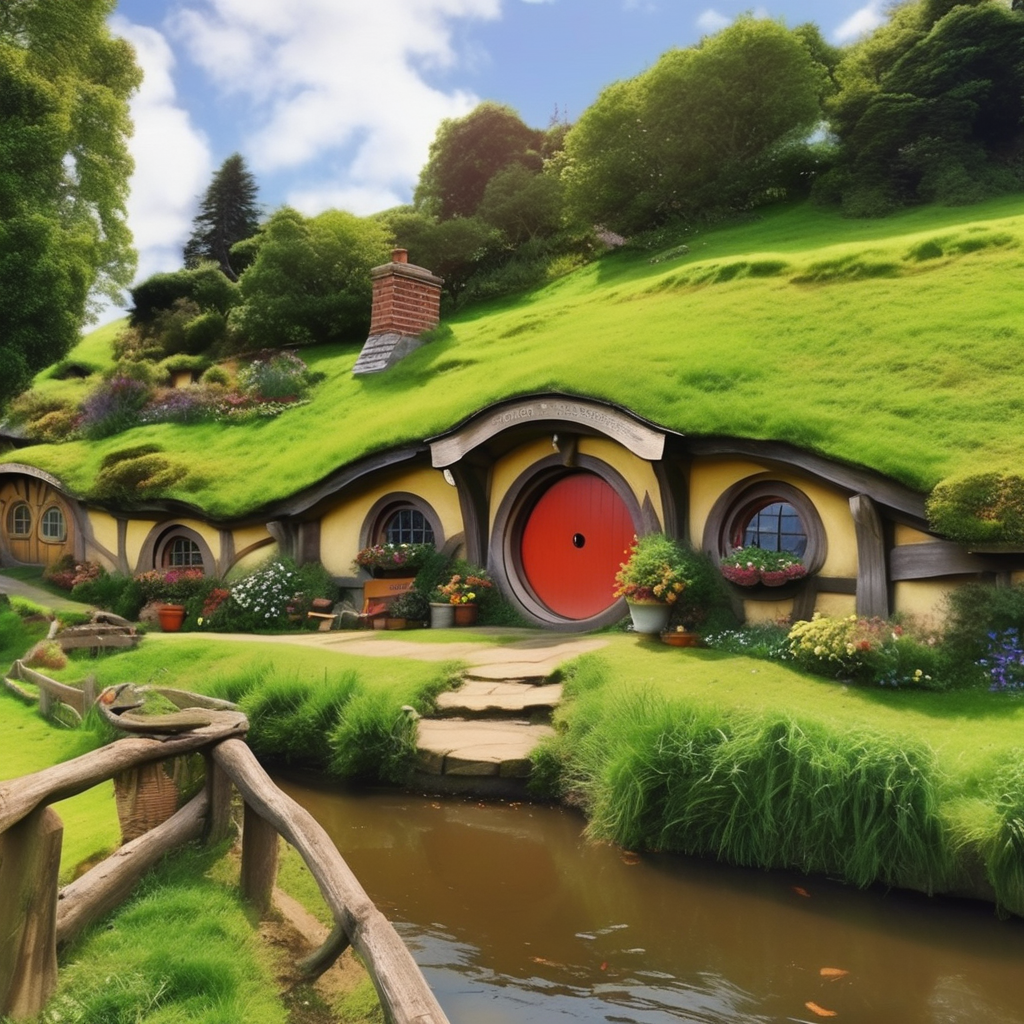

In [8]:
image.images[0]

***Now we have succesfully generated our first image using sdxl-base model you can try any model you want. just check which parameter values work for them***

# Now we will use DreamShaperXL model from civitai to generate image way faster than what we tried previously
# 

In [9]:
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://civitai.com/api/download/models/333449 -d /kaggle/working -o DreamShaperXL.safetensors
#The aria2c makes downloading faster

[#b05568 6.4GiB/6.4GiB(99%) CN:3 DL:172MiB]
Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
b05568|OK  |   294MiB/s|/kaggle/working/DreamShaperXL.safetensors

Status Legend:
(OK):download completed.


# Now loading Pipline from the directory 

In [10]:
pipe = StableDiffusionXLPipeline.from_single_file(
        "/kaggle/working/DreamShaperXL.safetensors" ,
        use_safetensors=True,
    torch_dtype=torch.float16,
    ).to("cuda:1")

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.88k [00:00<?, ?B/s]

# define parameters for dreamshaper 

In [11]:
prompt1 = "a fairytale village on the riverside, high res, high quality, realistic, 8K, UHD,landscape"
guidance_scale1 = 2 # keep guidance scale always 2 for dreanshaper 
num_inference_steps1 = 8 # works for 4-10
#keep heighte width default i.e. 1024

  0%|          | 0/8 [00:00<?, ?it/s]

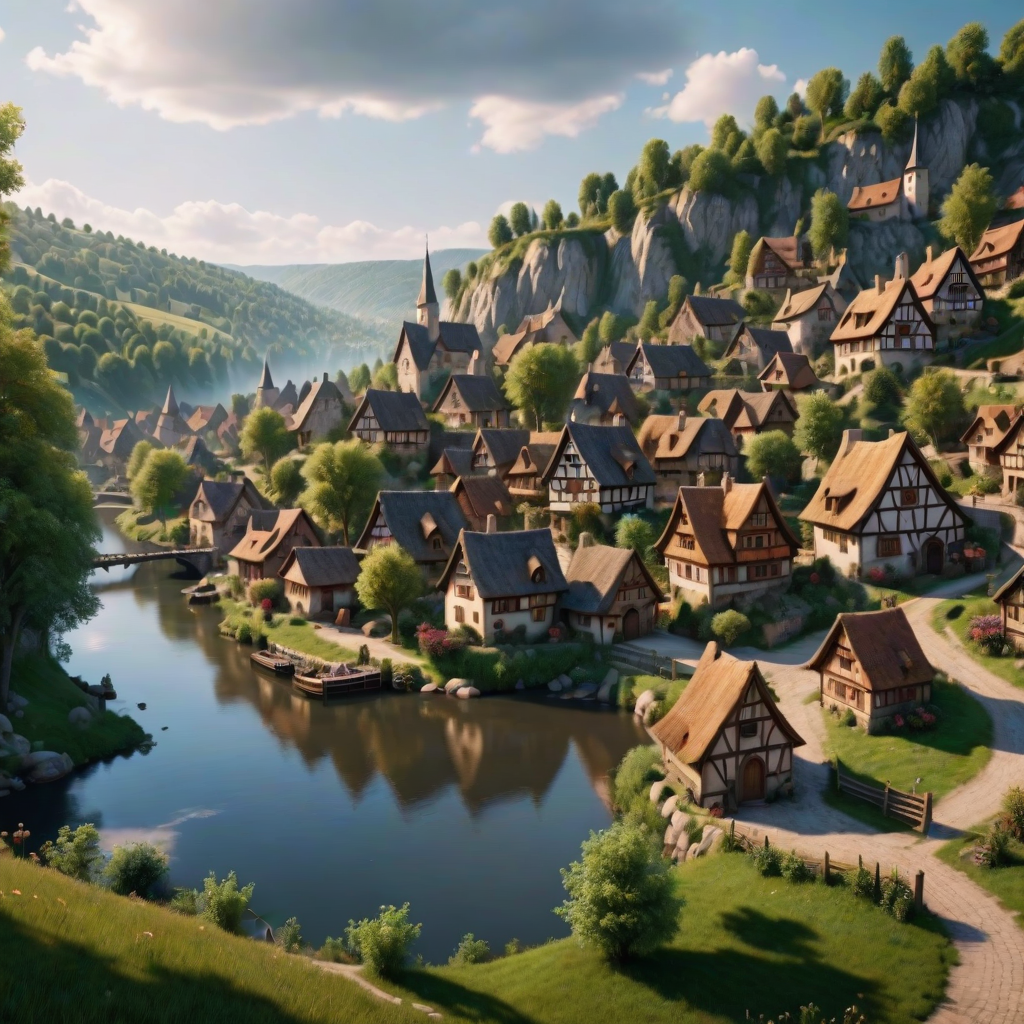

In [12]:
image1 = pipe(prompt=prompt1,guidace_scale=guidance_scale1, num_inference_steps=num_inference_steps1).images[0]
image1

We can optimise generation using different scheduler

In [13]:
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

  0%|          | 0/5 [00:00<?, ?it/s]

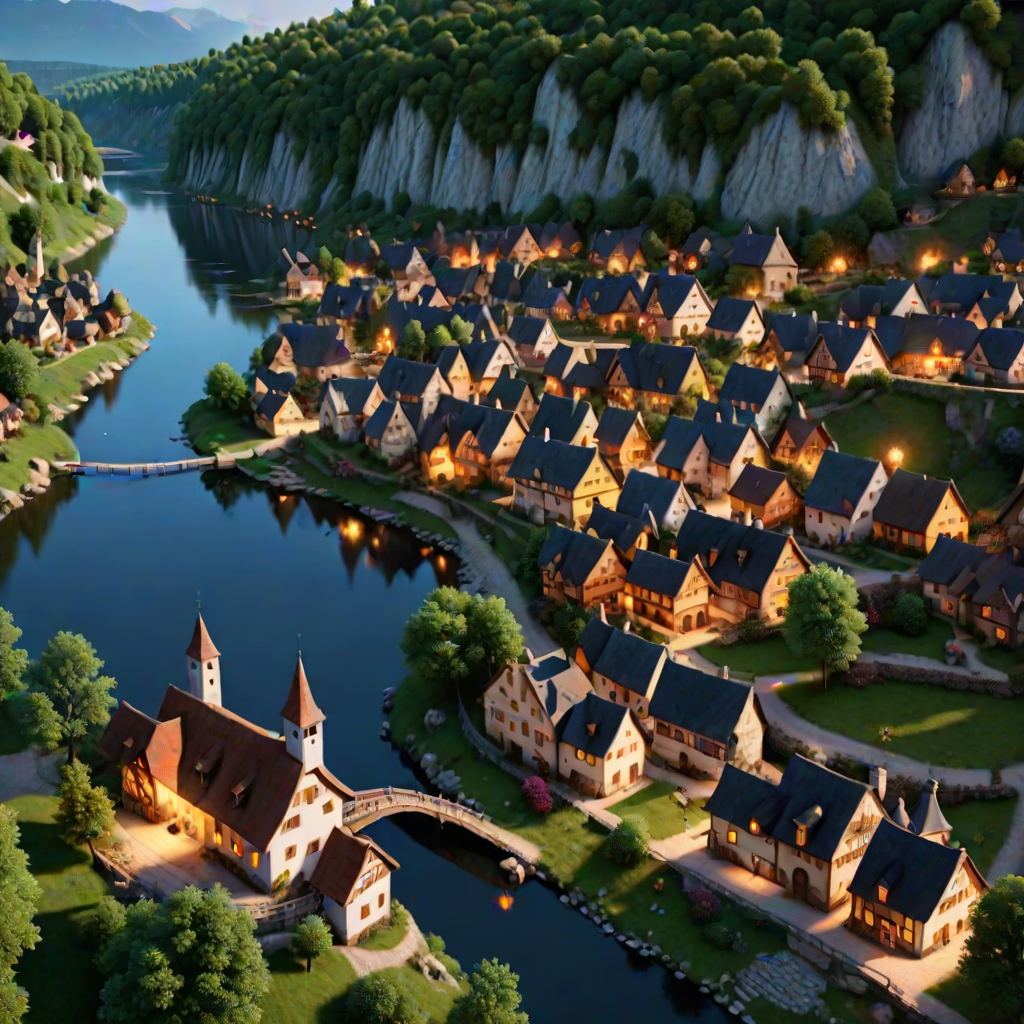

In [14]:
image2 = pipe(
    prompt=prompt1,
    guidace_scale=2 , 
    num_inference_steps=5
).images[0]
image2